# TRAFFIC SIGN RECOGNIZATION

The significance of traffic signs lies in their ability to assist drivers in adhering to traffic regulations and minimizing road accidents. Nonetheless, it can be challenging for drivers to pay attention to signs amid other road activities. Furthermore, the increasing development of automated driving and driverless cars underscores the importance of traffic sign recognition.

In this notebook we use the German Traffic Sign Recognition Benchmark Dataset which has lifelike images of traffic signs which have been classified into 43 classes. The train and test sets combined consist of more than 50000 images.

We have used google and chatGPT to resolve and debug errors from the code.

Source for dataset : "https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign?datasetId=82373&searchQuery=Cnn"

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras 
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score


In [2]:
data = []
labels = []
classes = 43
img_path = "C:/Users/DELL 5401/Downloads/archive/train"

In [3]:
for i in range(classes):
    path = os.path.join(img_path,str(i))
    images = os.listdir(path)

    for a in images:

        image = Image.open(path + '/'+ a)
        image = image.resize((32,32))
        image = np.array(image)
        data.append(image)
        labels.append(i)

data = np.array(data)
labels = np.array(labels)

In [16]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

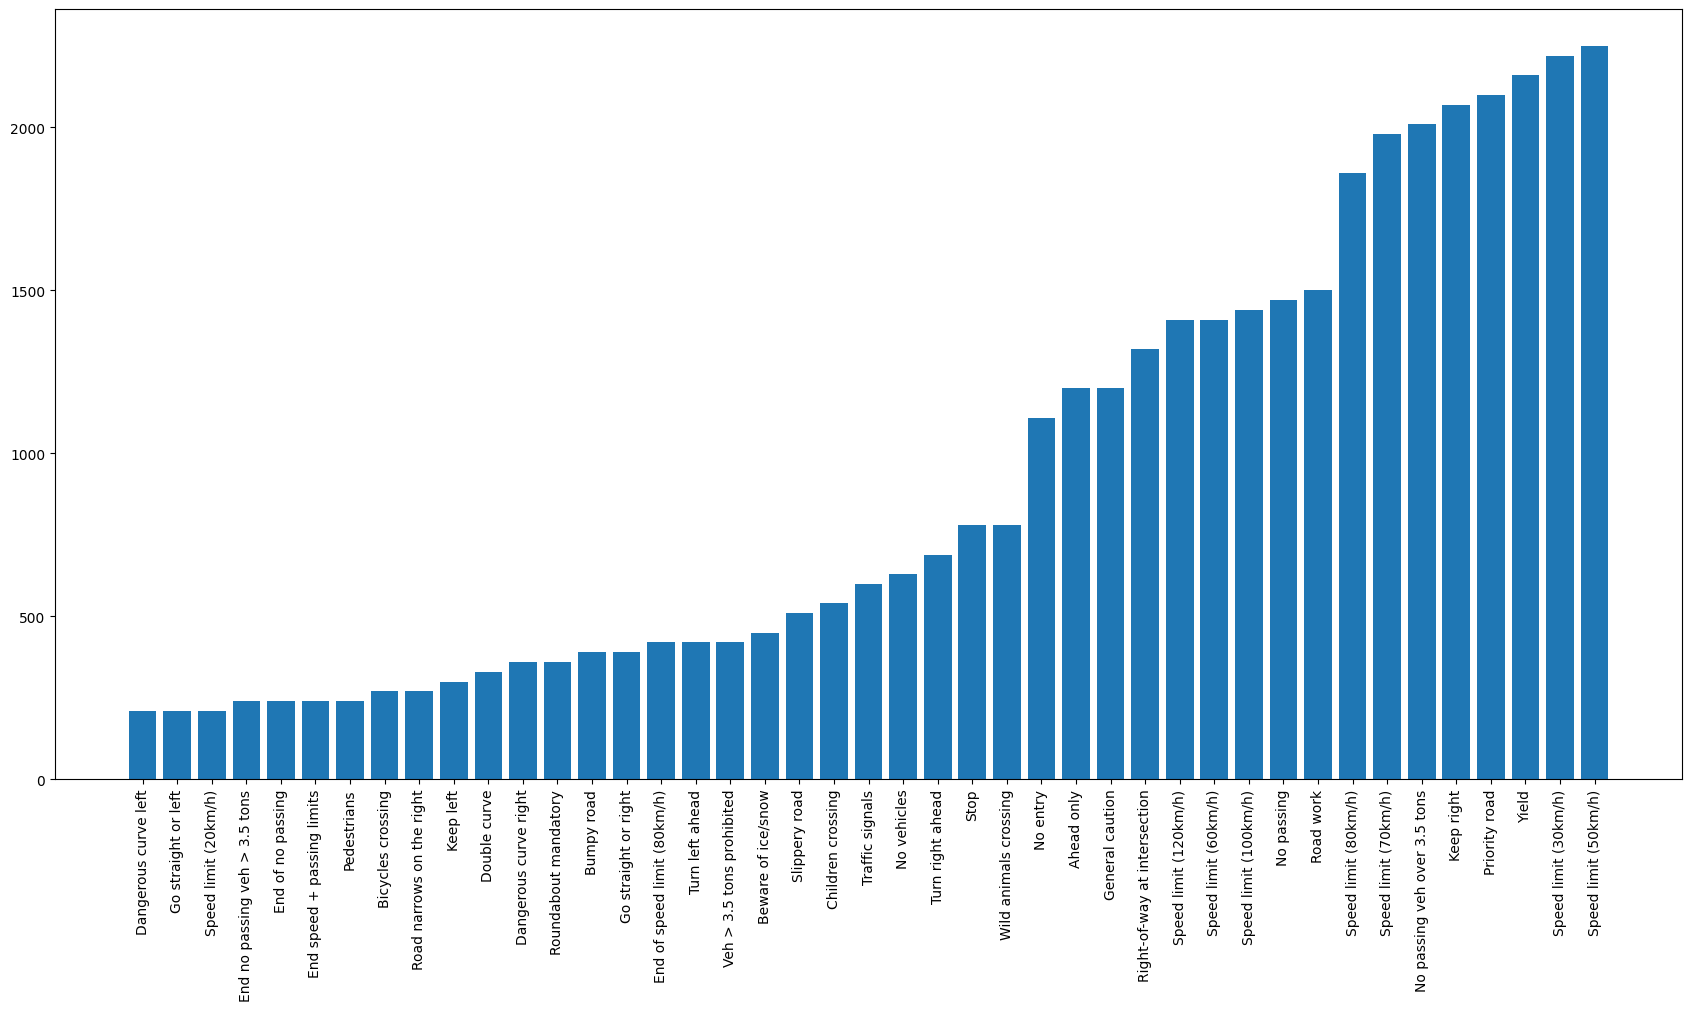

In [17]:
folders = os.listdir(img_path)

train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(img_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])
    
# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21,10))  
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

C:\Users\DELL 5401\AppData\Local\Temp\ipykernel_13916\739185635.py:14: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


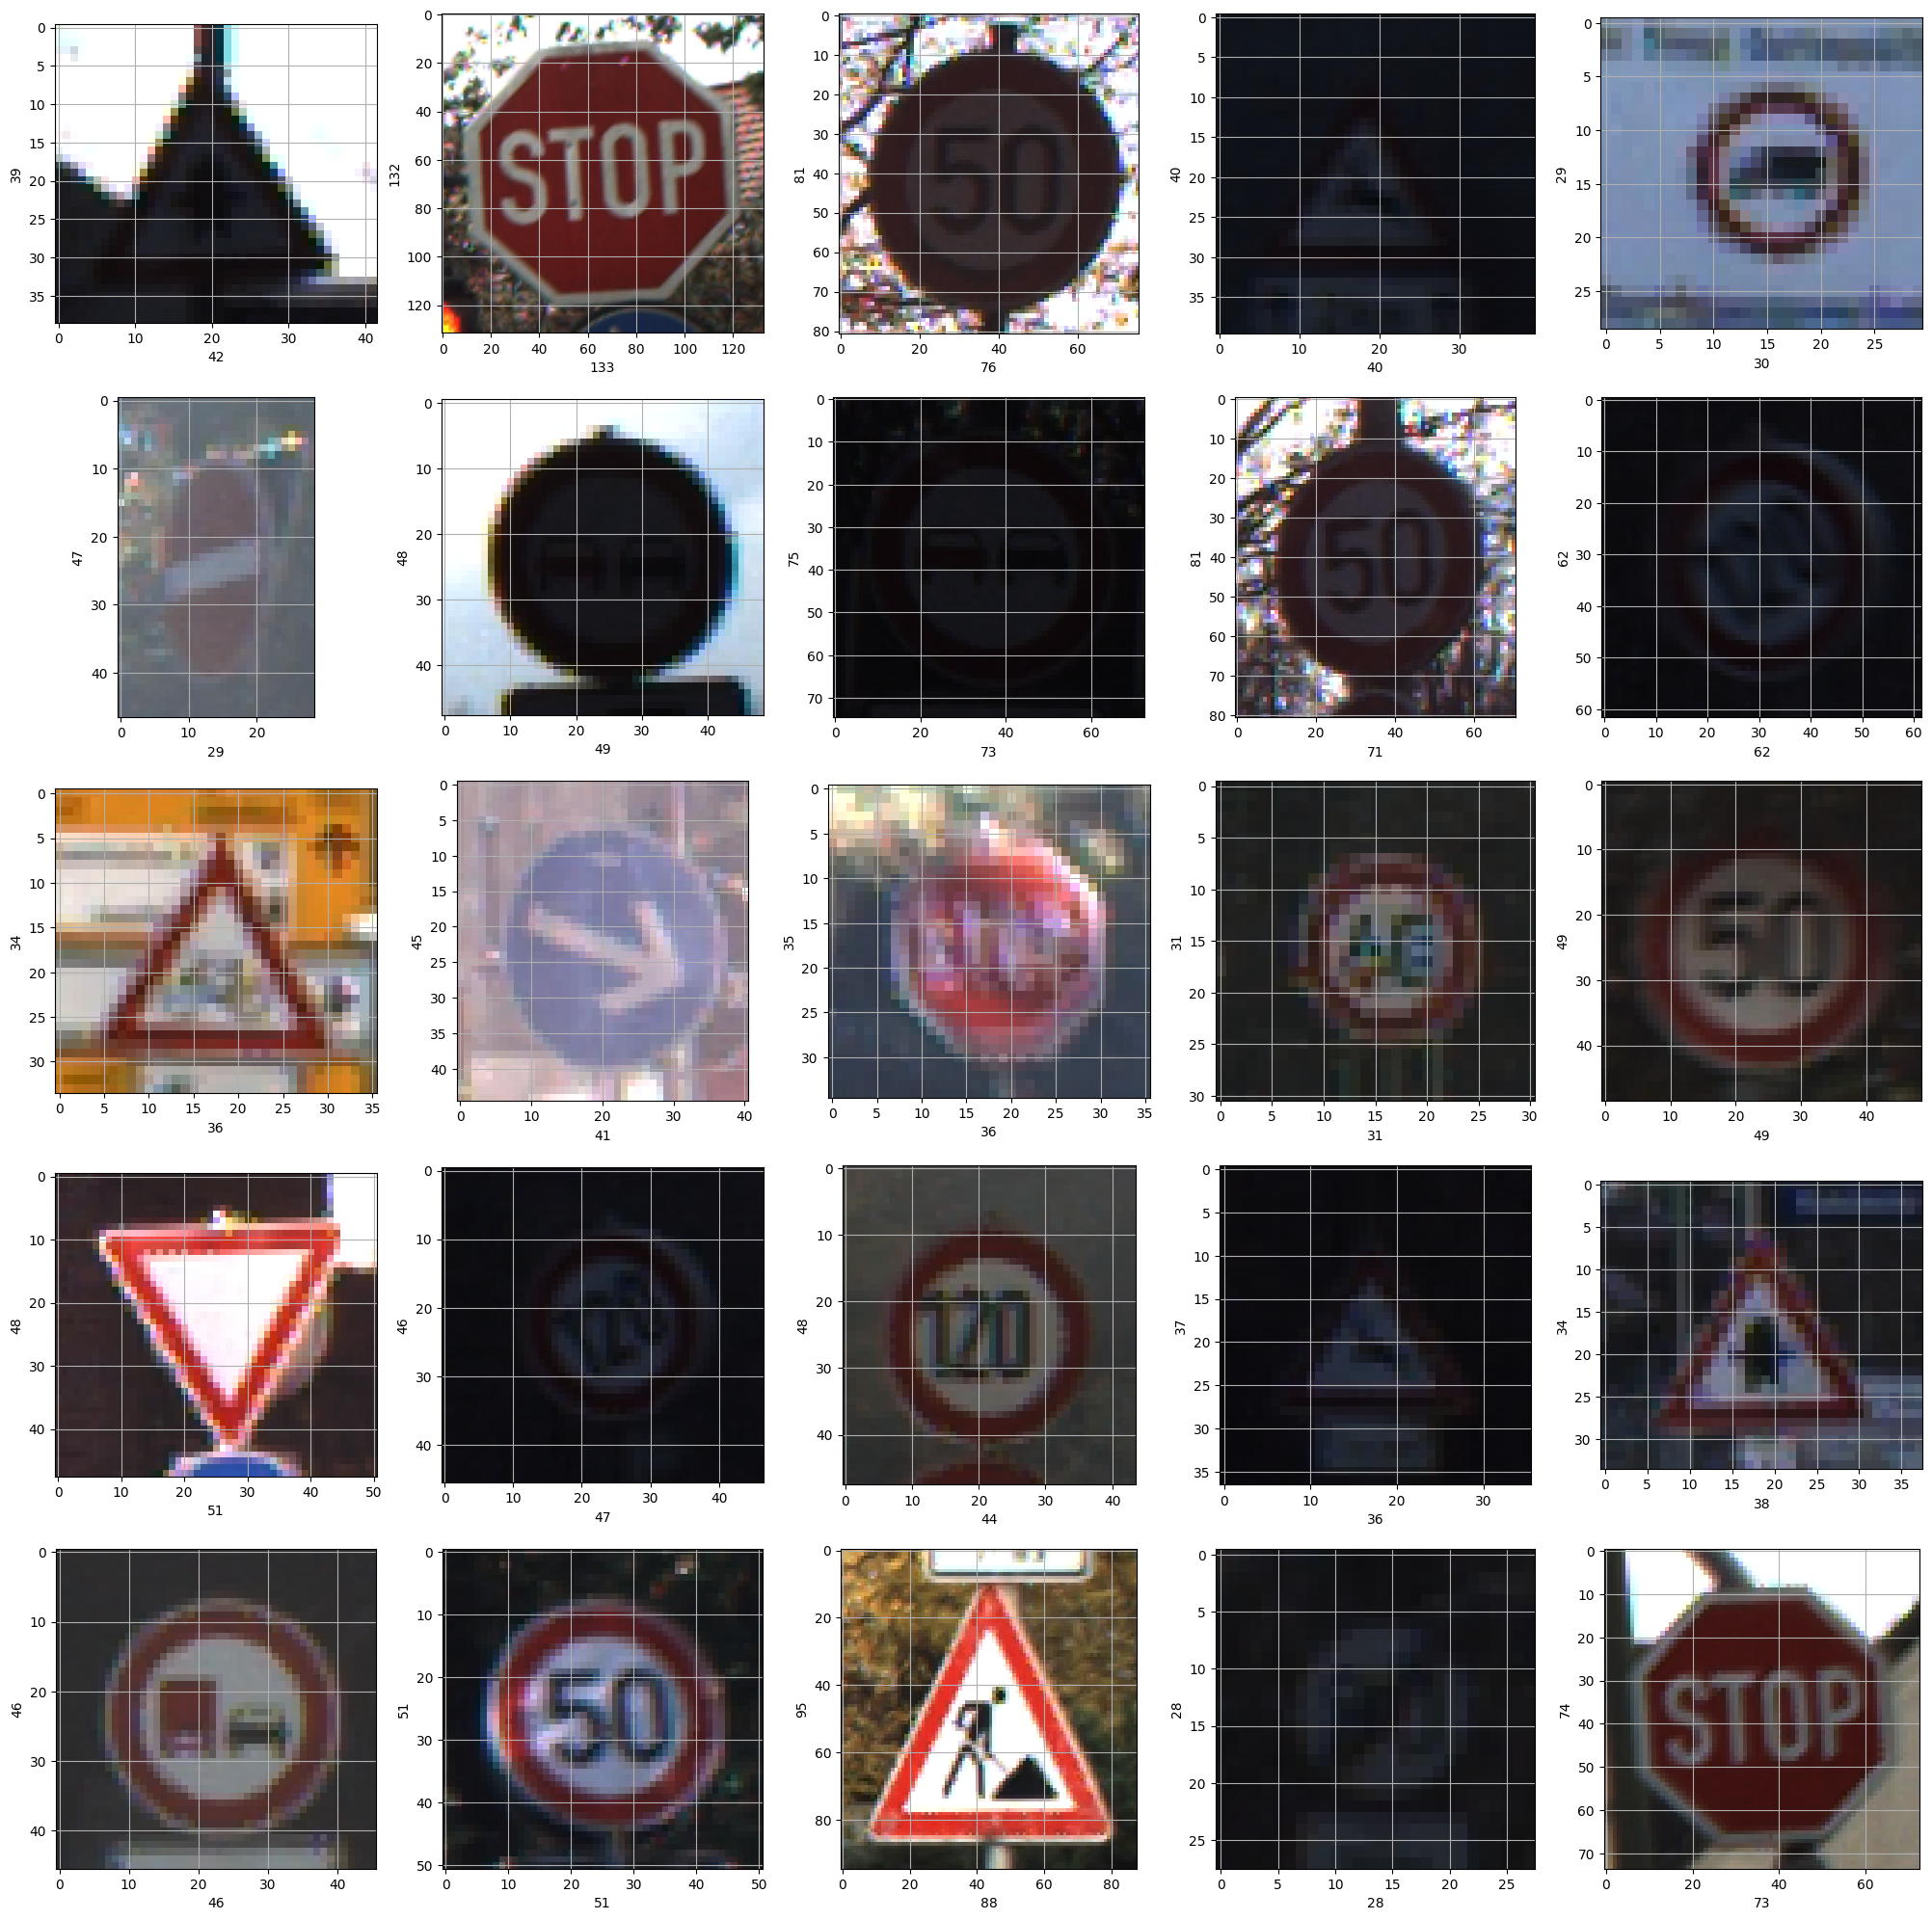

In [4]:
import random
from matplotlib.image import imread

test = pd.read_csv("C:/Users/DELL 5401/Downloads/archive" + '/Test.csv')
imgs = test["Path"].values

plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_img_path = "C:/Users/DELL 5401/Downloads/archive" + '/' + random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.grid(b=None)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)

In [5]:
print(data.shape, labels.shape)

# Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Displaying the shape after the split
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(39209, 32, 32, 3) (39209,)
(31367, 32, 32, 3) (7842, 32, 32, 3) (31367,) (7842,)


In [6]:
IMG_HEIGHT = 32
IMG_WIDTH = 32
channels = 3

Reference for building this architecture : "https://www.kaggle.com/code/yacharki/traffic-signs-image-classification-96-cnn"


Note: In the above link they haven't used keras for implementing CNN. I have used keras in this code as it is a powerful and flexible tool for building deep learning models. It offers a user-friendly interface, modularity, flexibility, compatibility, and speed, making it a popular choice among researchers and developers.

In [8]:
model = keras.models.Sequential([    
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,channels)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),
    
    keras.layers.Dense(43, activation='softmax')
])

In [9]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#M odel display
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 128)       7

In [70]:
# Training the Model
with tf.device('/GPU:0'):
    epochs = 15
    history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/15
981/981 [==============================] - 80s 80ms/step - loss: 0.3433 - accuracy: 0.9089 - val_loss: 0.0803 - val_accuracy: 0.9748
Epoch 2/15
981/981 [==============================] - 86s 88ms/step - loss: 0.0441 - accuracy: 0.9871 - val_loss: 0.0354 - val_accuracy: 0.9898
Epoch 3/15
981/981 [==============================] - 86s 88ms/step - loss: 0.0324 - accuracy: 0.9905 - val_loss: 0.0413 - val_accuracy: 0.9895
Epoch 4/15
981/981 [==============================] - 79s 80ms/step - loss: 0.0225 - accuracy: 0.9934 - val_loss: 0.0659 - val_accuracy: 0.9830
Epoch 5/15
981/981 [==============================] - 75s 76ms/step - loss: 0.0287 - accuracy: 0.9914 - val_loss: 0.0261 - val_accuracy: 0.9939
Epoch 6/15
981/981 [==============================] - 74s 76ms/step - loss: 0.0160 - accuracy: 0.9949 - val_loss: 0.0406 - val_accuracy: 0.9893
Epoch 7/15
981/981 [==============================] - 70s 72ms/step - loss: 0.0150 - accuracy: 0.9953 - val_loss: 0.0215 - val_accuracy:

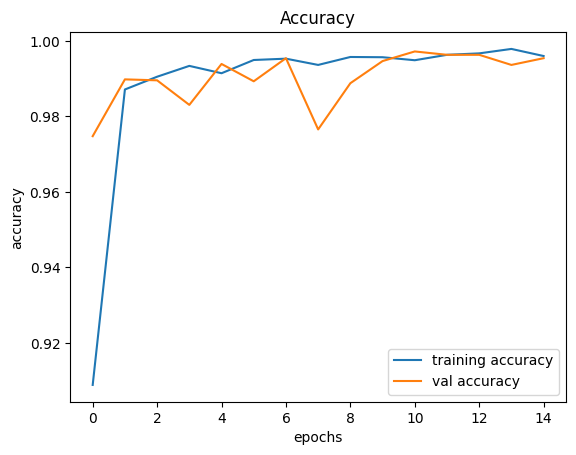

In [72]:
# plotting acuuracy vs epoch
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()



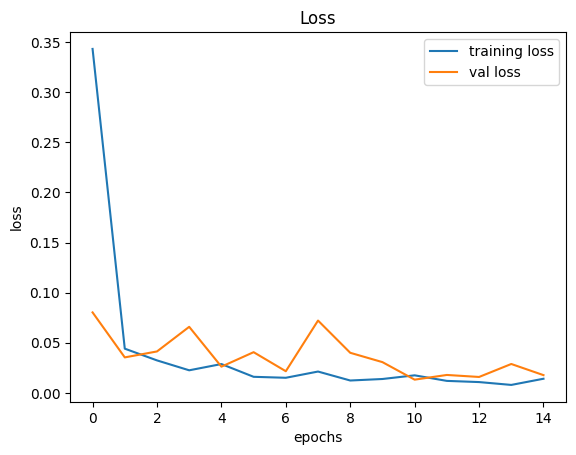

In [73]:
#plotting loss vs epochs
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [10]:
from sklearn.metrics import accuracy_score

# Train the model
model.fit(X_train, y_train)

# Predict the labels for test data
y_pred = model.predict(X_test)

# Convert one-hot encoded labels back to integer labels
y_test_int = np.argmax(y_test, axis=1)
y_pred_int = np.argmax(y_pred, axis=1)

# Calculate accuracy score
accuracy = accuracy_score(y_test_int, y_pred_int)

print("Accuracy score:", accuracy)

246/246 [==============================] - 5s 19ms/step
Accuracy score: 0.9891609283346086


In [13]:
from sklearn.metrics import confusion_matrix

# Predict the labels for test data
y_pred = model.predict(X_test)

# Convert the predicted labels and ground truth labels back to 1D arrays
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Calculate the confusion matrix
confusion_mtx = confusion_matrix(y_test_classes, y_pred_classes)

print(confusion_mtx)


246/246 [==============================] - 4s 17ms/step
[[ 36   2   0 ...   0   0   0]
 [  0 495   0 ...   0   0   0]
 [  0   3 446 ...   0   0   0]
 ...
 [  0   0   0 ...  60   0   0]
 [  0   0   0 ...   0  47   0]
 [  0   0   0 ...   0   0  41]]


246/246 [==============================] - 5s 20ms/step


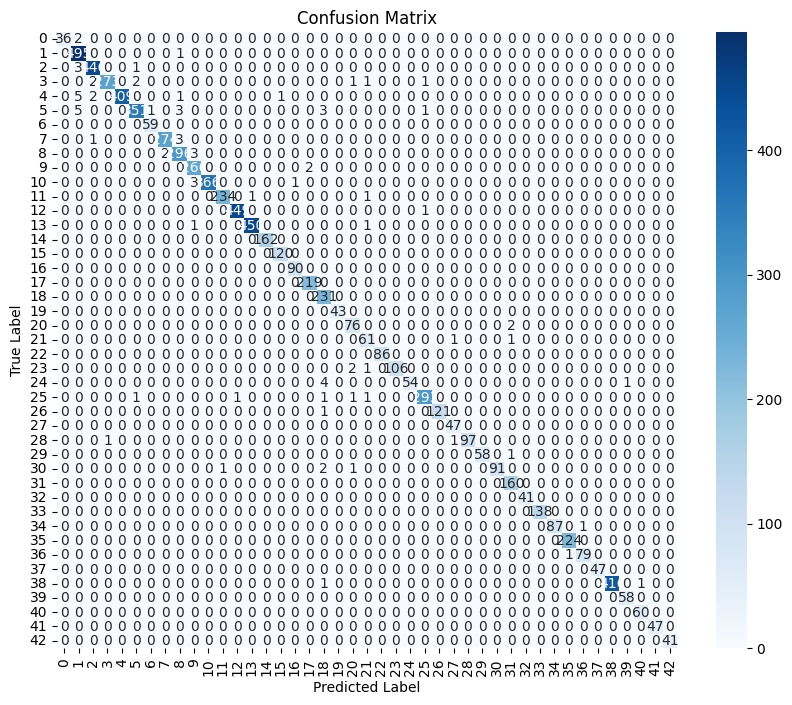

In [18]:
import seaborn as sns

# Predict the labels for test data
y_pred = model.predict(X_test)

# Convert the predicted labels and ground truth labels back to 1D arrays
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Calculate the confusion matrix
confusion_mtx = confusion_matrix(y_test_classes, y_pred_classes)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True, cmap='Blues', fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


We have plotted some graphs to give a visual representation that would help to undertand the code in better way.
The above heatmap shows that the model has performed well.